You are given a function defined over a 2D region. Your task is to:

1. Create a 2D grid using `np.ogrid` over a square region.
2. Define a complex function `f(z) = sin(|z²|) * exp(-|z| / 2)` evaluated over this grid.
3. Compute the magnitude of `f` and store it in a real array.
4. Apply a mask that hides values where `|z| > 4`.
5. Visualize the masked result using pcolormesh.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import unittest

Matplotlib is building the font cache; this may take a moment.


## Step 1

<!--
x, y = np.mgrid[-5:5:501j, -5:5:501j]
z = x + 1j*y
-->

In [3]:
x, y = np.mgrid[-5:5:501j, -5:5:501j]
z = x + 1j*y

## Step 2

<!--
f = np.sin(np.abs(z**2)) * np.exp(-np.abs(z)/2)
-->

In [4]:
f = np.sin(np.abs(z**2)) * np.exp(-np.abs(z)/2)

## Step 3

<!--
magnitude = np.abs(f)
-->

In [5]:
magnitude = np.abs(f)
magnitude

array([[0.00764644, 0.01316328, 0.01821268, ..., 0.01821268, 0.01316328,
        0.00764644],
       [0.01316328, 0.01823181, 0.02262681, ..., 0.02262681, 0.01823181,
        0.01316328],
       [0.01821268, 0.02262681, 0.02618595, ..., 0.02618595, 0.02262681,
        0.01821268],
       ...,
       [0.01821268, 0.02262681, 0.02618595, ..., 0.02618595, 0.02262681,
        0.01821268],
       [0.01316328, 0.01823181, 0.02262681, ..., 0.02262681, 0.01823181,
        0.01316328],
       [0.00764644, 0.01316328, 0.01821268, ..., 0.01821268, 0.01316328,
        0.00764644]])

## Step 4

<!--
radius = np.abs(z)
masked_magnitude = np.ma.masked_where(radius > 4, magnitude)
-->

In [6]:
radius = np.abs(z)
masked_magnitude = np.ma.masked_where(radius > 4, magnitude)
masked_magnitude

masked_array(
  data=[[--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        ...,
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --]],
  mask=[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],
  fill_value=1e+20)

## Step 5

<!--
fig, ax = plt.subplots()
pc = ax.pcolormesh(x, y, masked_magnitude)
fig.colorbar(pc, ax=ax, label="|f(z)|")
ax.set_aspect("equal")
plt.show()
-->

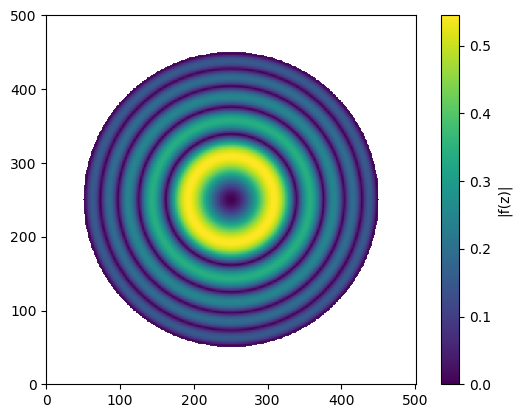

In [8]:
fig, ax = plt.subplots()
pc = ax.pcolormesh(masked_magnitude)
fig.colorbar(pc, ax=ax, label="|f(z)|")
ax.set_aspect("equal")
plt.show()

## Tests!

If you'd like, here are tests that will pass if you do the above part correctly

In [10]:
np.testing.assert_allclose(z[0,0], -5-5j)
np.testing.assert_allclose(f[0,0], -0.007646441029027583)
np.testing.assert_allclose(magnitude[0,0], 0.007646441029027583)
np.testing.assert_allclose(radius[0,0], 7.0710678118654755)